In [ ]:
!pip install --upgrade scipy
import scipy.stats as sps
import statsmodels.stats.weightstats as sm
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
np.random.seed(1)
chi_sample = sps.chi2(10).rvs(150)
print(sps.tmean(chi_sample), sps.tvar(chi_sample), sps.tstd(chi_sample))

10.141611694289773 21.63465486118451 4.651306790697053


In [ ]:
np.random.seed(4)
uniform_sample = sps.uniform(5, 10).rvs(150)
print(sps.tmean(uniform_sample), sps.tvar(uniform_sample), sps.tstd(uniform_sample))

10.266792648818582 8.137971896625956 2.852713076463519


In [ ]:
np.random.seed(2)
norm_sample = sps.norm(loc = 10, scale = 2).rvs(100)
print(sps.tmean(norm_sample), sps.tvar(norm_sample), sps.tstd(norm_sample))

9.792517732234806 4.34522534304783 2.084520410801446


In [ ]:
sps.pearsonr(chi_sample, uniform_sample)

(0.13727112058202717, 0.09391536662970018)

In [ ]:
sps.spearmanr(chi_sample, uniform_sample)

SpearmanrResult(correlation=0.10951420063113915, pvalue=0.1821823920591257)

In [ ]:
sps.kendalltau(chi_sample, uniform_sample)

KendalltauResult(correlation=0.07400447427293064, pvalue=0.17899461232857605)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(chi_sample, uniform_sample)
plt.show()

In [ ]:
emp_table = plt.hist2d(chi_sample, uniform_sample, bins=5)[0]
emp_table

In [ ]:
sps.chi2_contingency(emp_table)

In [ ]:
pears_xu = []
spear_xu = []
kend_xu = []
pears_xv = []
spear_xv = []
kend_xv = []
for la in np.linspace(0, 1):
  u = la*chi_sample + (1-la)*uniform_sample
  v = la*chi_sample**3 + (1-la)*uniform_sample**3
  pears_xu.append(sps.pearsonr(chi_sample, u)[0])
  spear_xu.append(sps.spearmanr(chi_sample, u)[0])
  kend_xu.append(sps.kendalltau(chi_sample, u)[0])
  pears_xv.append(sps.pearsonr(chi_sample, v)[0])
  spear_xv.append(sps.spearmanr(chi_sample, v)[0])
  kend_xv.append(sps.kendalltau(chi_sample, v)[0])
plt.plot(np.linspace(0, 1), pears_xu, color='green', label='Pearson')
plt.plot(np.linspace(0, 1), spear_xu, color='red', label='Spearman')
plt.plot(np.linspace(0, 1), kend_xu, color='blue', label='Kendall')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(np.linspace(0, 1), pears_xv, color='green', label='Pearson')
plt.plot(np.linspace(0, 1), spear_xv, color='red', label='Spearman')
plt.plot(np.linspace(0, 1), kend_xv, color='blue', label='Kendall')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.scatter(chi_sample, chi_sample**3)

In [ ]:
plt.scatter(sps.rankdata(chi_sample), sps.rankdata(chi_sample**3))

In [ ]:
sps.bartlett(chi_sample, uniform_sample, norm_sample)

BartlettResult(statistic=55.83440406785615, pvalue=7.511267113114583e-13)

In [ ]:
gen_sample = np.concatenate((chi_sample, uniform_sample, norm_sample))
print(sps.tmean(gen_sample), sps.tvar(gen_sample), len(gen_sample))

9.990345086972535 11.509162495170054 250


In [ ]:
(sps.tvar(chi_sample)*100 + sps.tvar(uniform_sample)*50 + sps.tvar(norm_sample)*100) / 250

11.568539981268064

In [ ]:
sps.f_oneway(chi_sample, uniform_sample, norm_sample)

F_onewayResult(statistic=0.2958352982660169, pvalue=0.7441731542012198)

In [ ]:
def tfreq(distr, n):
  chi_hist = np.histogram(uniform_sample, bins = n)
  tfreq = []

  if distr == 'chi2':
    tfreq.append(250*(sps.chi2.cdf(chi_hist[1][1], 10)))
    for i in range(1, n - 1):
      probability = sps.chi2.cdf(chi_hist[1][i+1], 10) - sps.chi2.cdf(chi_hist[1][i], 10)
      tfreq.append(250*probability)
    tfreq.append(250*(1 - sps.chi2.cdf(chi_hist[1][n - 1], 10)))

  elif distr == 'norm':
    tfreq.append(150*(sps.norm.cdf(chi_hist[1][1], loc = 10, scale = 4.47)))
    for i in range(1, n - 1):
      probability = sps.norm.cdf(chi_hist[1][i+1], loc = 10, scale = 4.47) - sps.norm.cdf(chi_hist[1][i], loc = 10, scale = 4.47)
      tfreq.append(150*probability)
    tfreq.append(150*(1 - sps.norm.cdf(chi_hist[1][n - 1], loc = 10, scale = 4.47)))

  elif distr == 'uniform':
    tfreq.append(150*(sps.uniform.cdf(chi_hist[1][1], loc = chi_hist[1][0], scale = chi_hist[1][n] - chi_hist[1][0])))
    for i in range(1, n - 1):
      probability = sps.uniform.cdf(chi_hist[1][i+1], loc = chi_hist[1][0], scale = chi_hist[1][n] - chi_hist[1][0]) - sps.uniform.cdf(chi_hist[1][i], loc = chi_hist[1][0], scale = chi_hist[1][n] - chi_hist[1][0])
      tfreq.append(150*probability)
    tfreq.append(150*(1 - sps.uniform.cdf(chi_hist[1][n - 1], loc = chi_hist[1][0], scale = chi_hist[1][n] - chi_hist[1][0])))

  np_tfreq = np.asarray(tfreq)
  return np_tfreq

In [ ]:
np.histogram(uniform_sample, bins = 8)

(array([32, 26, 41, 22, 34, 28, 33, 34]),
 array([ 5.01165851,  6.24796116,  7.4842638 ,  8.72056645,  9.95686909,
        11.19317173, 12.42947438, 13.66577702, 14.90207966]))

In [ ]:
tfreq('chi2', 8)

array([51.49547407, 28.7365474 , 30.06490512, 28.63171244, 25.40445967,
       21.33170178, 17.13781129, 47.19738823])

In [ ]:
sps.chisquare([32, 26, 41, 22, 34, 28, 33, 34], [51.49547407, 28.7365474 , 30.06490512, 28.63171244, 25.40445967,
       21.33170178, 17.13781129, 47.19738823])

Power_divergenceResult(statistic=36.51920978075147, pvalue=5.78393104649191e-06)

In [ ]:
sps.kstest(chi_sample, uniform_sample)

KstestResult(statistic=0.14533333333333334, pvalue=0.03475765256979613)

In [ ]:
chi_sample2 = sps.chi2(10).rvs(250)

In [ ]:
sps.wilcoxon(chi_sample2, chi_sample3)

WilcoxonResult(statistic=15292.0, pvalue=0.729671667803019)

In [ ]:
sps.mannwhitneyu(chi_sample, uniform_sample)

MannwhitneyuResult(statistic=18083.0, pvalue=0.5515815069400194)

In [ ]:
#fig = plt.figure(figsize=(8,4))
#ax1 = fig.add_subplot(2, 2, 1)
#ax2 = fig.add_subplot(2, 2, 2)
#ax3 = fig.add_subplot(2, 2, 3)
#ax4 = fig.add_subplot(2, 2, 4)
x1 = np.linspace(sps.tmean(chi_sample) - 2*1.96, sps.tmean(chi_sample) + 2*1.96, 100)
x2 = np.linspace(sps.tmean(uniform_sample) - 1.19*1.96, sps.tmean(uniform_sample) + 1.19*1.96, 100)
x3 = np.linspace(sps.tmean(norm_sample) - 0.4*1.96, sps.tmean(norm_sample) + 0.4*1.96, 100)
#ax1.hist(chi_sample, bins=5)
#ax2.hist(chi_sample, bins=10)
#ax3.hist(chi_sample, bins=15)
#ax4.hist(chi_sample, bins=8)
#plt.hist(chi_sample, bins = 8, color = 'violet', alpha = 0.7, label = 'chi2(10)')
#plt.hist(uniform_sample, bins = 8, color = 'green', alpha = 0.5, label = 'uniform(5, 15)')
#x = np.linspace(min(chi_sample), max(chi_sample), 150)
#plt.plot(np.sort(chi_sample), np.linspace(0, 1, 150), color = 'violet', label = 'chi2(10)')
#plt.plot(np.sort(uniform_sample), np.linspace(0, 1, 250), color = 'green', label = 'uniform(5, 15)')
y1 = np.linspace(5, 5, 100)
y2 = np.linspace(7, 7, 100)
y3 = np.linspace(9, 9, 100)
plt.plot(x1, y1, label = 'm1')
plt.plot(x2, y2, label = 'm2')
plt.plot(x3, y3, label = 'm3')
#plt.plot(x, sps.uniform.cdf(x, loc = min(x), scale = max(x) - min(x)), color = 'green', alpha = 0.7, label = 'uniform cdf')
#plt.plot(x, sps.chi2.cdf(x, 5), color = 'violet', alpha = 0.8, label = 'chi2(5) cdf')
#plt.boxplot((chi_sample, uniform_sample, norm_sample), vert = False, labels = ('X1', 'X2', 'X3'))
#plt.boxplot(norm_sample)
plt.legend(loc = 'best')
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({'sample': gen_sample, 'group': np.repeat(['a', 'a', 'b', 'c', 'c'], 50)})



In [ ]:
import statsmodels.stats.multicomp as ssm

print(ssm.pairwise_tukeyhsd(endog=df['sample'], groups=df['group']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     a      b   0.0989    0.9 -1.2907 1.4884  False
     a      c  -0.2968 0.7915 -1.4313 0.8378  False
     b      c  -0.3956 0.7603 -1.7852 0.9939  False
---------------------------------------------------


In [ ]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
sample_sal = pandas.read_excel('/data_matstat_K5.xls', sheet_name = 'A - aaup')['A7'].tolist()

In [ ]:
np.histogram(sample_calories, bins = 8)

(array([ 56, 158,  73,  25,   1,   1,   0,   1]),
 array([ 445.2  , 1222.325, 1999.45 , 2776.575, 3553.7  , 4330.825,
        5107.95 , 5885.075, 6662.2  ]))

In [ ]:
np.around(np.histogram(sample_calories, bins = 8)[0]/315, decimals=4)

array([0.1778, 0.5016, 0.2317, 0.0794, 0.0032, 0.0032, 0.    , 0.0032])

In [ ]:
cal_mean = sps.tmean(sample_calories)
cal_var = sps.tvar(sample_calories)
cal_std = sps.tstd(sample_calories)
cal_std

680.3474348482101

In [ ]:
def group_probs():
  boundaries = np.histogram(sample_calories, bins = 8)[1]
  probs = []
  probs.append(sps.norm.cdf(boundaries[1], cal_mean, cal_std))
  for i in range(1, 7):
    prob = sps.norm.cdf(boundaries[i+1], cal_mean, cal_std) - sps.norm.cdf(boundaries[i], cal_mean, cal_std)
    probs.append(prob)
  probs.append(1 - sps.norm.cdf(boundaries[7], cal_mean, cal_std))
  np_probs = np.asarray(probs)
  return np_probs

group_probs()*315

array([6.27753788e+01, 1.31635536e+02, 9.69993814e+01, 2.20451446e+01,
       1.51377481e+00, 3.06059481e-02, 1.78103042e-04, 2.93440787e-07])

In [ ]:
sps.chisquare([ 56, 158,  73,  25+   1+   1+   0+   1], [6.27753788e+01, 1.31635536e+02, 9.69993814e+01, 2.20451446e+01+
       1.51377481e+00+ 3.06059481e-02+ 1.78103042e-04+ 2.93440787e-07])

Power_divergenceResult(statistic=12.77406344306531, pvalue=0.005151577089097738)

In [ ]:
sps.jarque_bera(sample_calories)

Jarque_beraResult(statistic=995.2198328770955, pvalue=0.0)

In [ ]:
sps.norm.cdf(1999.45, loc=cal_mean, scale=cal_var) - sps.norm.cdf(1222.325, loc=cal_mean, scale=cal_var)

0.000669791075931514

In [ ]:
hist_sal = np.histogram(sample_sal, bins = 100)
hist_sal_dist = sps.rv_histogram(hist_sal, False)

In [ ]:
x = np.linspace(min(sample_calories), max(sample_calories), 100)
plt.plot(x, sps.norm.pdf(x, loc=cal_mean, scale=cal_std), color='red')
plt.hist(sample_calories, bins=8, density=True)
#plt.hist(sample_calories, bins=8, weights=np.ones_like(sample_calories) / len(sample_calories))
plt.show()

In [ ]:
sps.tmean(sample_calories)

1796.654603174603

In [ ]:
sps.tvar(sample_calories)

462872.6321045395

In [ ]:
sps.ttest_1samp(sample_calories, 2000)

Ttest_1sampResult(statistic=-5.304676094267186, pvalue=2.1351342582879566e-07)

In [ ]:
(314)*sps.tvar(sample_calories)/550000

264.2581936015007

In [ ]:
2*min(sps.chi2.cdf(264.2581936015007, 314), 1 - sps.chi2.cdf(264.2581936015007, 314))

0.03811189147410265

In [ ]:
cum_freq = sps.cumfreq(sample_fat, numbins=8, defaultreallimits=(14.4, 235.9))
cum_freq

CumfreqResult(cumcount=array([ 36., 147., 242., 289., 304., 312., 314., 315.]), lowerlimit=14.4, binsize=27.6875, extrapoints=0)

In [ ]:
rel_cum_freq = cum_freq.cumcount / 315

In [ ]:
rel_freq = sps.relfreq(sample_fat, numbins=8, defaultreallimits=(14.4, 235.9))
rel_freq

RelfreqResult(frequency=array([0.11428571, 0.35238095, 0.3015873 , 0.14920635, 0.04761905,
       0.02539683, 0.00634921, 0.0031746 ]), lowerlimit=14.4, binsize=27.6875, extrapoints=0)

In [ ]:
freq = rel_freq.frequency * 315

In [ ]:
x = rel_freq.lowerlimit + np.linspace(0, rel_freq.binsize*rel_freq.frequency.size, rel_freq.frequency.size)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(x, rel_cum_freq, width=rel_freq.binsize)
ax1.plot(x, rel_cum_freq, color='red')
ax1.set_title('Cumulative relative frequency')
ax1.set_xlim([0, x.max()+14])
plt.show()

In [ ]:
plt.plot(np.sort(sample_fat), np.linspace(0, 1, 315, endpoint=False))
plt.show()

In [ ]:
sps.bayes_mvs(sample_calories, 0.9)

(Mean(statistic=1796.654603174603, minmax=(1733.4154664074752, 1859.8937399417307)),
 Variance(statistic=465839.76436161983, minmax=(407891.4098866664, 530545.912593546)),
 Std_dev(statistic=681.9778775165637, minmax=(638.663769041791, 728.3858267385122)))

In [ ]:
!pip install xlrd==1.2.0

import pandas as pd

sample_calories = np.array(pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C6'].tolist())

sample_fat = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C7'].tolist()

sample_fiber = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C8'].tolist()

sample_carotene = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C13'].tolist()

sample_retinol = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C14'].tolist()

sample_sex = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C2'].tolist()

sample_smoking = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C3'].tolist()

sample_quetelet = pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C4'].tolist()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sample_calories = np.array(pd.read_excel('/data_matstat_K5.xls', sheet_name = 'C - plasma')['C6'].tolist())
sample_carotene = np.array(sample_carotene)
sample_quetelet = np.array(sample_quetelet)

In [ ]:
reg = sps.linregress(sample_calories, sample_carotene)

In [ ]:
x = np.array(sample_calories)
y = np.array(sample_carotene)
y_pred = reg.slope*x + reg.intercept
res_sum = 0
reg_sum = 0
total_sum = 0
x_sq_sum = 0
for i in range (0, 315):
  res_sum+=(y[i] - y_pred[i])**2
  reg_sum+=(y_pred[i] - np.mean(y))**2
  total_sum+=(y[i] - np.mean(y))**2
  x_sq_sum+=(x[i])**2
res_var = res_sum/315
reg_var = reg_sum/315
total_var = total_sum/315
print('reg_var =', reg_var, 'res_var = ', res_var, 'total_var = ', total_var, 'x_sq_sum = ', x_sq_sum, 'x_var = ', np.var(x))

reg_var = 16.462780398473033 res_var =  33366.516045502256 total_var =  33382.97882590072 x_sq_sum =  1162151851.8599994 x_var =  461403.1951772235


In [ ]:
def sqrt(x):
  return x**(1/2)

In [ ]:
sps.t.ppf(0.995, 313)

2.5916276998084755

In [ ]:
reg.slope + sps.t.ppf(0.95, 313)*sqrt(res_var)*sqrt(1/(315*np.var(x)))

0.019022966390964617

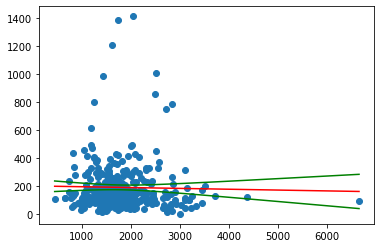

In [ ]:
x = np.linspace(min(sample_calories), max(sample_calories), 100)
f =  reg.slope*x + reg.intercept
f_low = f - sps.t.ppf(0.95, 313)*sqrt(res_var*(1/315 + (x - np.mean(sample_calories))**2/(315*np.var(sample_calories))))
f_high = f + sps.t.ppf(0.95, 313)*sqrt(res_var*(1/315 + (x - np.mean(sample_calories))**2/(315*np.var(sample_calories))))
plt.scatter(sample_calories, sample_carotene)
plt.plot(x, f, color = 'red')
plt.plot(x, f_low, color = 'green')
plt.plot(x, f_high, color = 'green')

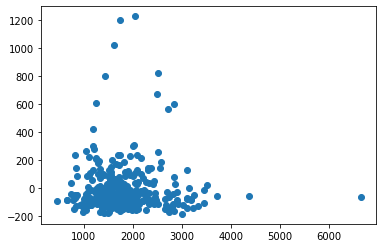

In [ ]:
plt.scatter(x, y - y_pred)

In [ ]:
reg

LinregressResult(slope=-0.005973258278958722, intercept=200.6239454749055, rvalue=-0.02220695686723203, pvalue=0.6946031791352822, stderr=0.015199978146706481, intercept_stderr=29.19571569951552)

In [ ]:
F = np.matrix([np.ones(315), sample_calories, sample_calories**2]).T
betas = np.matmul(np.matmul(np.linalg.inv(np.matmul(F.T, F)), F.T), sample_carotene)
beta0 = betas.item([0][0])
beta1 = betas.item([1][0])
beta2 = betas.item([2][0])

In [ ]:
np.matmul(F.T, F)

matrix([[3.15000000e+02, 5.65946200e+05, 1.16215185e+09],
        [5.65946200e+05, 1.16215185e+09, 2.78230225e+12],
        [1.16215185e+09, 2.78230225e+12, 8.07001934e+15]])

In [ ]:
betas

matrix([[ 1.56531322e+02,  3.70710218e-02, -9.01050102e-06]])

In [ ]:
x = np.array(sample_calories)
y = np.array(sample_carotene)
y_pred = beta0 + beta1*x + beta2*x**2
res_sum = 0
reg_sum = 0
total_sum = 0
x_sq_sum = 0
for i in range (0, 315):
  res_sum+=(y[i] - y_pred[i])**2
  reg_sum+=(y_pred[i] - np.mean(y))**2
  total_sum+=(y[i] - np.mean(y))**2
  x_sq_sum+=(x[i])**2
res_var = res_sum/315
reg_var = reg_sum/315
total_var = total_sum/315
print('reg_var =', reg_var, 'res_var = ', res_var, 'total_var = ', total_var, 'x_sq_sum = ', x_sq_sum, 'x_var = ', np.var(x))

reg_var = 136.46102080306048 res_var =  33246.517805097676 total_var =  33382.97882590072 x_sq_sum =  1162151851.8599994 x_var =  461403.1951772235


In [ ]:
from sympy import *
init_printing()
F = Matrix([np.ones(315), sample_calories, sample_calories**2]).T


In [ ]:
F.T*F

⎡    315.0          565946.2         1162151851.86    ⎤
⎢                                                     ⎥
⎢  565946.2      1162151851.86      2782302252188.73  ⎥
⎢                                                     ⎥
⎣1162151851.86  2782302252188.73  8.07001933780826e+15⎦

In [ ]:
x = symbols('x')
fi = Matrix([1, x, x**2])

In [ ]:
(fi.T*(F.T*F)**-1)*fi

⎡ 2 ⎛                      2                                               ⎞  
⎣x ⋅⎝2.14789204198156e-15⋅x  - 1.02607464840796e-11⋅x + 1.05106468814094e-8⎠ +

                      2     ⎛                        2                        
 1.05106468814094e-8⋅x  + x⋅⎝- 1.02607464840796e-11⋅x  + 5.58971809662414e-8⋅x

                      ⎞                                             ⎤
 - 6.25722273987861e-5⎠ - 6.25722273987861e-5⋅x + 0.0768176082044522⎦

In [ ]:
res = (fi.T*(F.T*F)**-1)*fi

In [ ]:
res

⎡ 2 ⎛                      2                                               ⎞  
⎣x ⋅⎝2.14789204198156e-15⋅x  - 1.02607464840796e-11⋅x + 1.05106468814094e-8⎠ +

                      2     ⎛                        2                        
 1.05106468814094e-8⋅x  + x⋅⎝- 1.02607464840796e-11⋅x  + 5.58971809662414e-8⋅x

                      ⎞                                             ⎤
 - 6.25722273987861e-5⎠ - 6.25722273987861e-5⋅x + 0.0768176082044522⎦

In [ ]:
res.evalf

<bound method MatrixOperations.evalf of Matrix([[x**2*(2.14789204198156e-15*x**2 - 1.02607464840796e-11*x + 1.05106468814094e-8) + 1.05106468814094e-8*x**2 + x*(-1.02607464840796e-11*x**2 + 5.58971809662414e-8*x - 6.25722273987861e-5) - 6.25722273987861e-5*x + 0.0768176082044522]])>

In [ ]:
band_arr = []
for i in range (0, 315):
  band_arr.append(res[0, 0].subs(x, sample_calories[i]))

In [ ]:
band_arr = np.array(band_arr)
band_arr[314]

In [ ]:
res1 = res[0, 0]
sub = res1.subs(x, 0)
sub

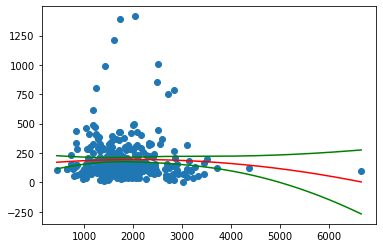

In [ ]:
plt.scatter(sample_calories, sample_carotene)
x = np.linspace(min(sample_calories), max(sample_calories), 315)
f = beta0 + beta1*x + beta2*x**2
f_low = f - sps.t.ppf(0.95, 313)*sqrt(res_var*(x**2*(2.14789204198156e-15*x**2 - 1.02607464840796e-11*x + 1.05106468814094e-8) + 1.05106468814094e-8*x**2 + x*(-1.02607464840796e-11*x**2 + 5.58971809662414e-8*x - 6.25722273987861e-5) - 6.25722273987861e-5*x + 0.0768176082044522))
f_high = f + sps.t.ppf(0.95, 313)*sqrt(res_var*(x**2*(2.14789204198156e-15*x**2 - 1.02607464840796e-11*x + 1.05106468814094e-8) + 1.05106468814094e-8*x**2 + x*(-1.02607464840796e-11*x**2 + 5.58971809662414e-8*x - 6.25722273987861e-5) - 6.25722273987861e-5*x + 0.0768176082044522))
plt.plot(x, f, color = 'red')
plt.plot(x, f_high, color='green')
plt.plot(x, f_low, color='green')

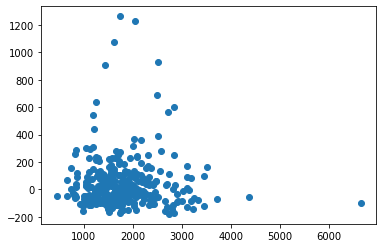

In [ ]:
plt.scatter(sample_calories, sample_carotene - f)

In [ ]:
1 - sps.f.cdf(0.63, 2, 312)

In [ ]:
x = symbols('x')
f = beta0 + beta1*x + beta2*x**2
f_low = f - sps.t.ppf(0.95, 313)*sqrt(res_var*res1)
f_high = f + sps.t.ppf(0.95, 313)*sqrt(res_var*res1)
p1 = plotting.plot(f)
plt.scatter(sample_calories, sample_carotene)

In [ ]:
F = Matrix([np.ones(315), sample_calories, sample_quetelet]).T
y = Matrix([sample_carotene]).T
beta = ((F.T*F)**-1)*F.T*y
beta0 = beta[0]
beta1 = beta[1]
beta2 = beta[2]

In [ ]:
y_pred = beta0 + beta1*sample_calories + beta2*sample_quetelet
res_sum = 0
reg_sum = 0
total_sum = 0
x_sq_sum = 0
for i in range (0, 315):
  res_sum+=(sample_carotene[i] - y_pred[i])**2
  reg_sum+=(y_pred[i] - np.mean(sample_carotene))**2
  total_sum+=(sample_carotene[i] - np.mean(sample_carotene))**2
res_var = res_sum/315
reg_var = reg_sum/315
total_var = total_sum/315
print('reg_var =', reg_var, 'res_var = ', res_var, 'total_var = ', total_var)

reg_var = 1771.84968451284 res_var =  31611.1291413879 total_var =  33382.97882590072


In [ ]:
import sklearn.metrics

In [ ]:
sklearn.metrics.explained_variance_score(sample_carotene, reg.slope*sample_calories + reg.intercept)

0.0004931489333032113

In [ ]:
sps.tvar(sample_carotene)

33489.2940450915

In [ ]:
sps.pearsonr(sample_carotene, sample_retinol)

PearsonRResult(statistic=0.07157724015217476, pvalue=0.20517488254189867)

In [ ]:
sps.pearsonr(sample_carotene, sample_retinol).confidence_interval(confidence_level=0.99)

ConfidenceInterval(low=-0.02141836867011403, high=0.1633448791752626)

In [ ]:
sps.spearmanr(sample_carotene, sample_retinol)

SpearmanrResult(correlation=0.13062133340920742, pvalue=0.020393608129350045)

In [ ]:
sps.kendalltau(sample_carotene, sample_retinol)

KendalltauResult(correlation=0.0857942303995992, pvalue=0.02343985266111217)

In [ ]:
sps.kendalltau(sample_calories, sample_fat)

KendalltauResult(correlation=0.7189893498217673, pvalue=1.0366799713773913e-80)

In [ ]:
sps.kendalltau(sample_calories, sample_fiber)

KendalltauResult(correlation=0.3927045363921576, pvalue=3.524126469362575e-25)

In [ ]:
sps.kendalltau(sample_fiber, sample_fat)

KendalltauResult(correlation=0.21622621725714256, pvalue=1.1599307874398759e-08)

In [ ]:
sps.rankdata(sample_calories)

In [ ]:
conc_coeff = 0
for i in range(0, 314):
  temp_sum = 0
  for k in range(0, 3):
    conc_coeff+=(1/3*)**2

In [ ]:
def conc_coef(samples):
  conc = 0
  for i in range(0, 314):
    temp_sum = 0
    for k in range(0, 3):
      temp_sum+=sps.rankdata(samples[k])[i] - 158
    conc+=(1/3*temp_sum)**2
  return 12/(315**3-315)*conc

In [ ]:
conc_coef((sample_calories, sample_fat, sample_fiber))

0.7258600389818636

In [ ]:
sps.tvar(sample_quetelet)

36.16278839419423

In [ ]:
sps.tmean(sample_quetelet)

26.15737352380952

In [ ]:
sample_smoking.count('Current Smoker')

43

In [ ]:
df = pd.DataFrame({'Smoking Status': sample_smoking, 'Quetelet': sample_quetelet})
# df = df.set_index('Smoking Status')


In [ ]:
df = pd.DataFrame({'Smoking Status': sample_smoking, 'Quetelet': sample_quetelet})
df

,Smoking Status,Quetelet
0,Former,21.48380
1,Never,23.87631
2,Former,20.01080
3,Former,25.14062
4,Never,20.98504
...,...,...
310,Former,25.89669
311,Never,23.82703
312,Never,24.26126
313,Former,23.45255


In [ ]:
quet_never = df.groupby('Smoking Status')['Quetelet'].apply(lambda x: np.array(x)).loc['Never']
quet_former = df.groupby('Smoking Status')['Quetelet'].apply(lambda x: np.array(x)).loc['Former']
quet_current = df.groupby('Smoking Status')['Quetelet'].apply(lambda x: np.array(x)).loc['Current Smoker']

In [ ]:
df.groupby('Smoking Status')['Quetelet'].apply(lambda x: np.array(x))

Smoking Status
Current Smoker    [16.33114, 25.87867, 21.99912, 23.34593, 25.11...
Former            [21.4838, 20.0108, 25.14062, 27.52136, 34.9699...
Never             [23.87631, 20.98504, 22.01154, 28.75702, 23.07...
Name: Quetelet, dtype: object

In [ ]:
sps.f_oneway(quet_never, quet_former, quet_current)

F_onewayResult(statistic=2.072548064382787, pvalue=0.12759407850703594)

In [ ]:
df.groupby('Smoking Status')['Quetelet'].apply(lambda x: list(x))

Smoking Status
Current Smoker    [16.33114, 25.87867, 21.99912, 23.34593, 25.11...
Former            [21.4838, 20.0108, 25.14062, 27.52136, 34.9699...
Never             [23.87631, 20.98504, 22.01154, 28.75702, 23.07...
Name: Quetelet, dtype: object

In [ ]:
df.groupby(['Smoking Status']).var()['Quetelet'].mean()

32.06689322678902

In [ ]:
df = pd.DataFrame({'Sex': sample_sex, 'Smoking status': sample_smoking})
df

,Sex,Smoking status
0,Female,Former
1,Female,Never
2,Female,Former
3,Female,Former
4,Female,Never
...,...,...
310,Female,Former
311,Female,Never
312,Female,Never
313,Female,Former


In [ ]:
emp_table = pd.crosstab(index=df['Sex'], columns=df['Smoking status'])
emp_table

Smoking status,Current Smoker,Former,Never
Sex,,,
Female,36,93,144
Male,7,22,13


In [ ]:
round(1 - sps.chi2.cdf(7.14, 2), 4)

0.0282

In [ ]:
import statsmodels.stats.descriptivestats as ssd

In [ ]:
bins_edges = [0]
for i in range(1, 9):
  bins_edges.append(bins_edges[i-1] + 215.875)
bins_edges

[0, 215.875, 431.75, 647.625, 863.5, 1079.375, 1295.25, 1511.125, 1727.0]

In [ ]:
np.histogram(sample_carotene, bins=bins_edges)

(array([229,  69,   8,   4,   2,   1,   2,   0]),
 array([   0.   ,  215.875,  431.75 ,  647.625,  863.5  , 1079.375,
        1295.25 , 1511.125, 1727.   ]))

In [ ]:
np.histogram(sample_retinol, bins=bins_edges)

(array([  3,  58, 144,  83,  19,   5,   1,   2]),
 array([   0.   ,  215.875,  431.75 ,  647.625,  863.5  , 1079.375,
        1295.25 , 1511.125, 1727.   ]))

In [ ]:
np.around(np.histogram(sample_carotene, bins=bins_edges)[0]/315, decimals=4)

array([0.727 , 0.219 , 0.0254, 0.0127, 0.0063, 0.0032, 0.0063, 0.    ])

In [ ]:
np.around(np.histogram(sample_retinol, bins=bins_edges)[0]/315, decimals=4)

array([0.0095, 0.1841, 0.4571, 0.2635, 0.0603, 0.0159, 0.0032, 0.0063])

In [ ]:
plt.hist(sample_carotene, bins=bins_edges, alpha=0.7, color='blue', weights=np.ones_like(sample_carotene) / 315, label='1')
plt.hist(sample_retinol, bins=bins_edges, alpha=0.7, color='violet', weights=np.ones_like(sample_retinol) / 315, label='2')
plt.legend(loc='best')
plt.show()

In [ ]:
sps.chisquare(np.histogram(sample_carotene, bins=bins_edges)[0], np.histogram(sample_retinol, bins=bins_edges)[0])

Power_divergenceResult(statistic=17252.467282074456, pvalue=0.0)

In [ ]:
sample_diff = np.asarray(sample_carotene) - np.asarray(sample_retinol)

In [ ]:
ssd.sign_test(sample_diff)

(-146.5, 1.9772043529779528e-75)

In [ ]:
sps.tmean(sample_carotene)

189.8920634920635

In [ ]:
sps.tmean(sample_retinol)

602.7904761904762

In [ ]:
sps.ttest_ind(sample_carotene, sample_retinol)

Ttest_indResult(statistic=-26.387385396640326, pvalue=7.906340283236184e-104)

In [ ]:
sps.tvar(sample_carotene)

33489.2940450915

In [ ]:
sps.tvar(sample_retinol)

43637.31901728845

In [ ]:
sps.tvar(sample_carotene)/sps.tvar(sample_retinol)

0.7674461859543558

In [ ]:
2*min(sps.f.cdf(0.767, 314, 314), 1 - sps.f.cdf(0.767, 314, 314))

0.019027704647087754

In [ ]:
sm.CompareMeans(sm.DescrStatsW(sample_carotene), sm.DescrStatsW(sample_retinol)).tconfint_diff(usevar='unequal')

(-443.62733091578133, -382.16949448104407)